### 1. Import the libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, matthews_corrcoef, accuracy_score
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Read the csv

In [4]:
df = pd.read_csv('corona_sample.csv', error_bad_lines=False, index_col=False, dtype='unicode')

#### a. look at the shape of the data

In [5]:
df.shape

(278848, 10)

#### b. look at the data

In [6]:
df.head(20)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
5,2020-04-30,1,0,0,0,0,negative,None,female,Other
6,2020-04-30,1,1,0,0,0,negative,None,male,Abroad
7,2020-04-30,0,0,0,0,0,negative,None,female,Other
8,2020-04-30,0,0,0,0,0,negative,None,male,Other
9,2020-04-30,0,0,0,0,0,negative,None,male,Contact with confirmed


#### c. feature engineering on the columns

In [7]:
df['cough'].value_counts()

0       236368
1        42228
None       252
Name: cough, dtype: int64

In [8]:
df['fever'].value_counts()

0       256844
1        21752
None       252
Name: fever, dtype: int64

In [9]:
df['sore_throat'].value_counts()

0       276921
1         1926
None         1
Name: sore_throat, dtype: int64

In [10]:
df['shortness_of_breath'].value_counts()

0       277270
1         1577
None         1
Name: shortness_of_breath, dtype: int64

In [11]:
df['head_ache'].value_counts()

0       276433
1         2414
None         1
Name: head_ache, dtype: int64

In [12]:
df['corona_result'].value_counts()

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [13]:
df['age_60_and_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: age_60_and_above, dtype: int64

In [14]:
df['gender'].value_counts()

female    130158
male      129127
None       19563
Name: gender, dtype: int64

In [15]:
df['test_indication'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: test_indication, dtype: int64

In [16]:
# remove rows that are not useful

def remove_unnecessary(df):
    df = df.loc[df.cough != 'None']
    df = df.loc[df.fever != 'None']
    df = df.loc[df.sore_throat != 'None']
    df = df.loc[df.shortness_of_breath != 'None']
    df = df.loc[df.head_ache != 'None']
    df = df.loc[df.age_60_and_above != 'None']
    df = df.loc[df.corona_result != 'other']
    df = df.drop('test_date', axis=1)
    return df

df = remove_unnecessary(df)

In [17]:
# checking the shape again

df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,1,0,0,0,0,negative,Yes,male,Other
122809,1,0,0,0,0,positive,No,female,Other
122810,0,0,0,0,0,negative,No,female,Other
122811,0,1,0,0,0,negative,No,female,Abroad
122812,1,0,0,0,0,negative,Yes,female,Other


In [18]:
# converting the categorical variables to 1/0s 

ls =['age_60_and_above', 'gender', 'test_indication']

df = pd.get_dummies(df, columns=ls)

In [19]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above_No,age_60_and_above_Yes,gender_None,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
122808,1,0,0,0,0,negative,0,1,0,0,1,0,0,1
122809,1,0,0,0,0,positive,1,0,0,1,0,0,0,1
122810,0,0,0,0,0,negative,1,0,0,1,0,0,0,1
122811,0,1,0,0,0,negative,1,0,0,1,0,1,0,0
122812,1,0,0,0,0,negative,0,1,0,1,0,0,0,1


In [20]:
# set the y-value
def cat(row):
    if row['corona_result'] == 'negative':
        val = 0
    else:
        val = 1
    return val

df['covid'] = df.apply(cat, axis=1)

In [21]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above_No,age_60_and_above_Yes,gender_None,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,covid
122808,1,0,0,0,0,negative,0,1,0,0,1,0,0,1,0
122809,1,0,0,0,0,positive,1,0,0,1,0,0,0,1,1
122810,0,0,0,0,0,negative,1,0,0,1,0,0,0,1,0
122811,0,1,0,0,0,negative,1,0,0,1,0,1,0,0,0
122812,1,0,0,0,0,negative,0,1,0,1,0,0,0,1,0


In [22]:
df = df.drop('corona_result', axis=1)

In [23]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_No,age_60_and_above_Yes,gender_None,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other,covid
122808,1,0,0,0,0,0,1,0,0,1,0,0,1,0
122809,1,0,0,0,0,1,0,0,1,0,0,0,1,1
122810,0,0,0,0,0,1,0,0,1,0,0,0,1,0
122811,0,1,0,0,0,1,0,0,1,0,1,0,0,0
122812,1,0,0,0,0,0,1,0,1,0,0,0,1,0


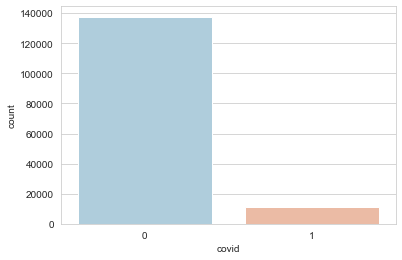

In [24]:
# Obeserve the 1 and 0 values

sns.set_style('whitegrid')
sns.countplot(x='covid',data=df,palette="RdBu_r")

In [25]:
df.dtypes

cough                                     object
fever                                     object
sore_throat                               object
shortness_of_breath                       object
head_ache                                 object
age_60_and_above_No                        uint8
age_60_and_above_Yes                       uint8
gender_None                                uint8
gender_female                              uint8
gender_male                                uint8
test_indication_Abroad                     uint8
test_indication_Contact with confirmed     uint8
test_indication_Other                      uint8
covid                                      int64
dtype: object

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_No', 'age_60_and_above_Yes', 'gender_None',
       'gender_female', 'gender_male', 'test_indication_Abroad',
       'test_indication_Contact with confirmed', 'test_indication_Other',
       'covid'],
      dtype='object')


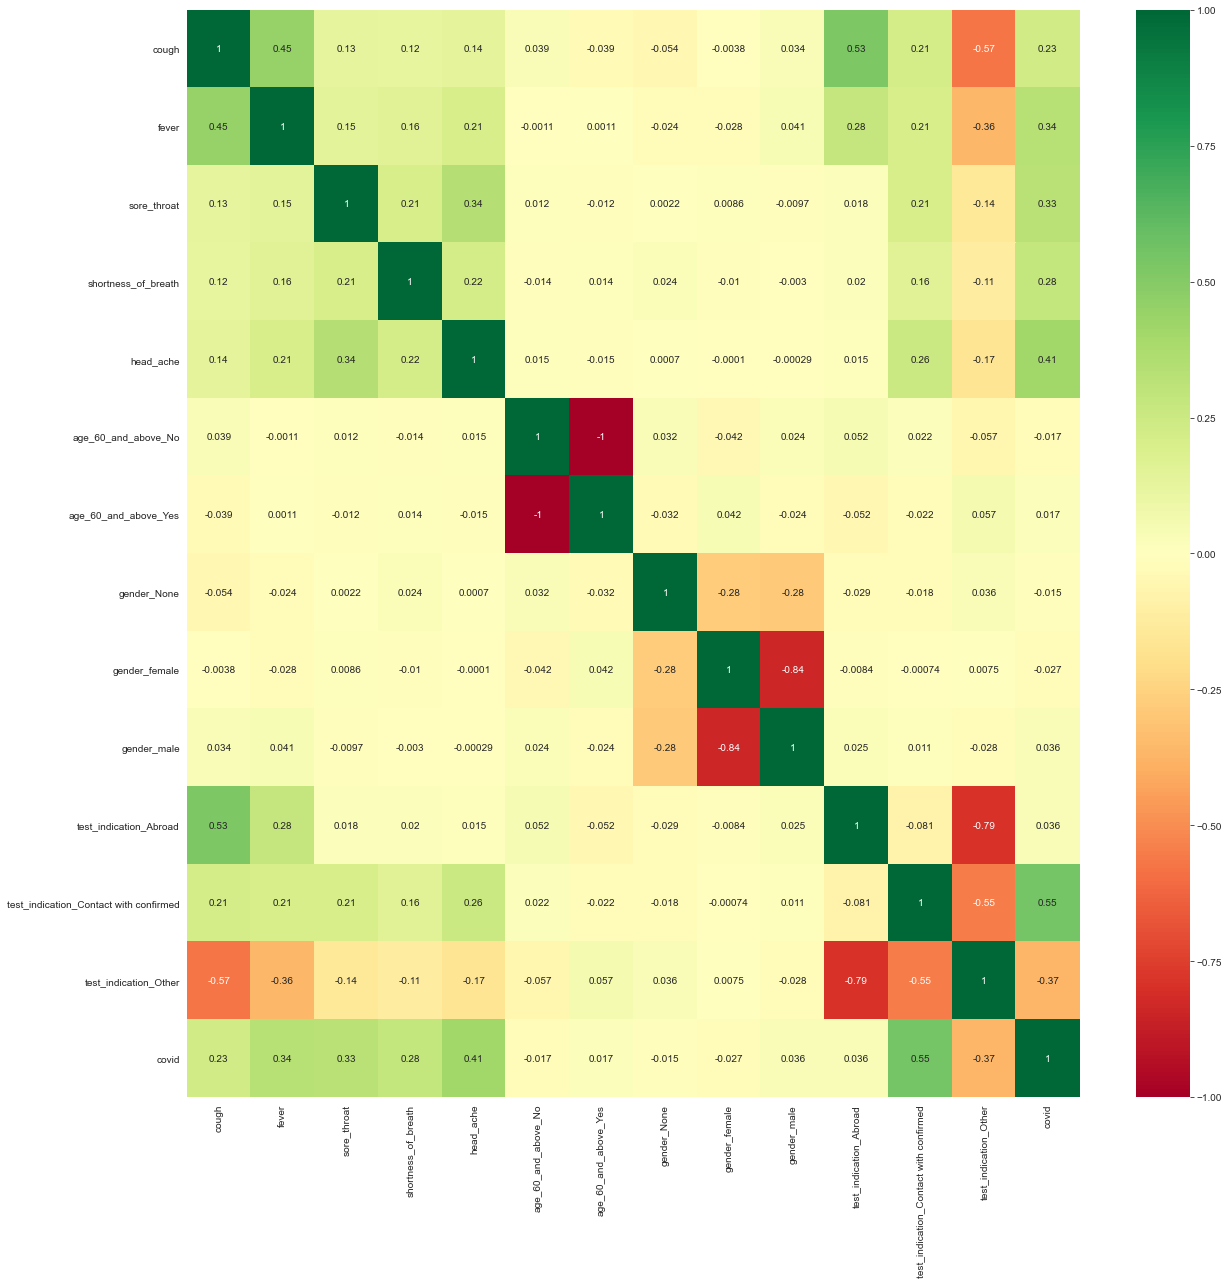

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

df = df.astype(int)

corrmat = df.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


### 3. Machine Learning Model

In [27]:
y = df['covid'].values
X = df.drop(columns=['covid'])

0 ) cough : 0.05018706144455801
1 ) fever : 0.10623048184040494
2 ) sore_throat : 0.10033488057001194
3 ) shortness_of_breath : 0.06913705589272415
4 ) head_ache : 0.16486838061167985
5 ) age_60_and_above_No : 0.004815380245707874
6 ) age_60_and_above_Yes : 0.0043579079057178526
7 ) gender_None : 0.005357892371921201
8 ) gender_female : 0.0044605186988160095
9 ) gender_male : 0.004379451129587542
10 ) test_indication_Abroad : 0.06161020815323898
11 ) test_indication_Contact with confirmed : 0.2877000285005361
12 ) test_indication_Other : 0.13656075263509568


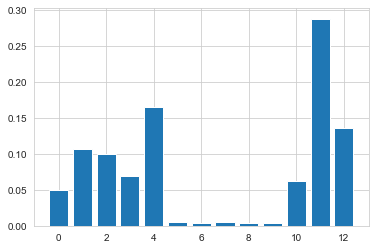

tn: 40771
fp: 445
fn: 1447
tp: 2050
0.6731030696041267  MCC
0.8216432865731463 Precision Score
0.9576856842529018 Accuracy Score

0 ) cough : 0.047079536222539756
1 ) fever : 0.08297945670876496
2 ) sore_throat : 0.09924366508617016
3 ) shortness_of_breath : 0.07555750258825833
4 ) head_ache : 0.174773593989507
5 ) age_60_and_above_No : 0.004364931588690692
6 ) age_60_and_above_Yes : 0.00434804896101884
7 ) gender_None : 0.005405358180927817
8 ) gender_female : 0.0040197863901471
9 ) gender_male : 0.004022599079939326
10 ) test_indication_Abroad : 0.06793520207066855
11 ) test_indication_Contact with confirmed : 0.3035564609239793
12 ) test_indication_Other : 0.12671385820938805


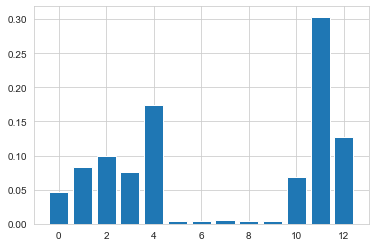

tn: 40770
fp: 446
fn: 1448
tp: 2049
0.6727401846432018  MCC
0.8212424849699399 Precision Score
0.957640954532239 Accuracy Score

0 ) cough : 0.04719317265196615
1 ) fever : 0.08810907194884474
2 ) sore_throat : 0.09494845017931755
3 ) shortness_of_breath : 0.07151902258328147
4 ) head_ache : 0.18917896161039927
5 ) age_60_and_above_No : 0.004284339677921292
6 ) age_60_and_above_Yes : 0.004295313410039282
7 ) gender_None : 0.005716502943068684
8 ) gender_female : 0.00435812831347519
9 ) gender_male : 0.004283623196141513
10 ) test_indication_Abroad : 0.04386417229875989
11 ) test_indication_Contact with confirmed : 0.3373590038144803
12 ) test_indication_Other : 0.10489023737230459


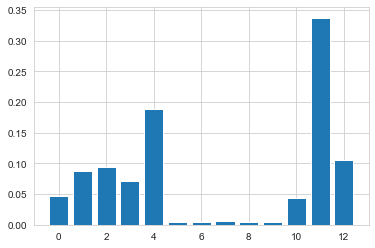

tn: 40771
fp: 445
fn: 1444
tp: 2053
0.6737256093017424  MCC
0.821857485988791 Precision Score
0.9577527788338962 Accuracy Score

0 ) cough : 0.04725818904536272
1 ) fever : 0.0869780096752731
2 ) sore_throat : 0.09288792485231159
3 ) shortness_of_breath : 0.07159330851591747
4 ) head_ache : 0.19050232880269727
5 ) age_60_and_above_No : 0.004688379480748144
6 ) age_60_and_above_Yes : 0.004284916612548892
7 ) gender_None : 0.005618563716344051
8 ) gender_female : 0.00387243277425708
9 ) gender_male : 0.0042983561246815625
10 ) test_indication_Abroad : 0.04057770708125313
11 ) test_indication_Contact with confirmed : 0.3557209737986286
12 ) test_indication_Other : 0.09171890951997654


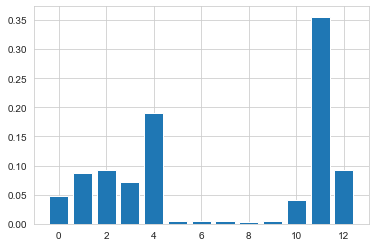

tn: 40770
fp: 446
fn: 1450
tp: 2047
0.6723247814985498  MCC
0.8210990774167669 Precision Score
0.957596224811576 Accuracy Score

0 ) cough : 0.04406348811889654
1 ) fever : 0.0811990482322075
2 ) sore_throat : 0.0910365028340675
3 ) shortness_of_breath : 0.06930368694335824
4 ) head_ache : 0.19481130711848227
5 ) age_60_and_above_No : 0.004347387479547923
6 ) age_60_and_above_Yes : 0.004390384706253044
7 ) gender_None : 0.005394415653755951
8 ) gender_female : 0.003740728721406687
9 ) gender_male : 0.004477757077673328
10 ) test_indication_Abroad : 0.039544150933502394
11 ) test_indication_Contact with confirmed : 0.3678053911421994
12 ) test_indication_Other : 0.0898857510386493


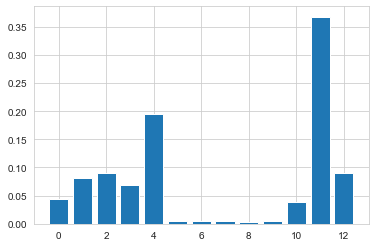

tn: 40771
fp: 445
fn: 1443
tp: 2054
0.673933026787843  MCC
0.8219287715086034 Precision Score
0.9577751436942277 Accuracy Score

0 ) cough : 0.04807571787735366
1 ) fever : 0.09461545029431341
2 ) sore_throat : 0.09491310209048728
3 ) shortness_of_breath : 0.07314487068269619
4 ) head_ache : 0.18479382783219236
5 ) age_60_and_above_No : 0.004401058551810501
6 ) age_60_and_above_Yes : 0.004390975688533039
7 ) gender_None : 0.005499854825717697
8 ) gender_female : 0.004116069060546034
9 ) gender_male : 0.00419767908744352
10 ) test_indication_Abroad : 0.05132209604286259
11 ) test_indication_Contact with confirmed : 0.32434656976284476
12 ) test_indication_Other : 0.10618272820319902


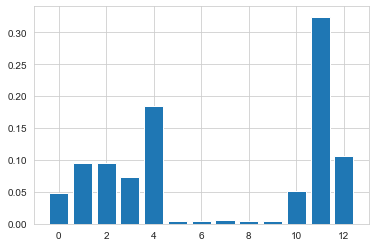

tn: 40772
fp: 444
fn: 1453
tp: 2044
0.6720121615017283  MCC
0.8215434083601286 Precision Score
0.9575738599512446 Accuracy Score

0 ) cough : 0.04693962608017624
1 ) fever : 0.08618596314887304
2 ) sore_throat : 0.09339480648552263
3 ) shortness_of_breath : 0.07328743945852681
4 ) head_ache : 0.19137644870335152
5 ) age_60_and_above_No : 0.0040872543337820266
6 ) age_60_and_above_Yes : 0.00466402983537584
7 ) gender_None : 0.005584767943695381
8 ) gender_female : 0.00410295693846563
9 ) gender_male : 0.004290741744247324
10 ) test_indication_Abroad : 0.06190053989483718
11 ) test_indication_Contact with confirmed : 0.29892441459149294
12 ) test_indication_Other : 0.12526101084165336


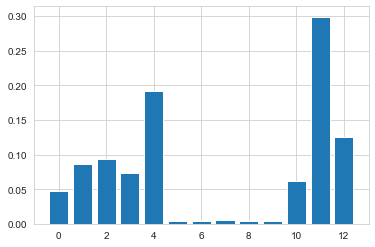

tn: 40772
fp: 444
fn: 1448
tp: 2049
0.6730508252878581  MCC
0.8219013237063778 Precision Score
0.9576856842529018 Accuracy Score

0 ) cough : 0.04877119066198938
1 ) fever : 0.10084498886974408
2 ) sore_throat : 0.10154168935372594
3 ) shortness_of_breath : 0.07072433865136042
4 ) head_ache : 0.16681444844974117
5 ) age_60_and_above_No : 0.004531467945581769
6 ) age_60_and_above_Yes : 0.004701289903551093
7 ) gender_None : 0.005551711325527657
8 ) gender_female : 0.004367365828308176
9 ) gender_male : 0.004251166438804059
10 ) test_indication_Abroad : 0.058110910938333045
11 ) test_indication_Contact with confirmed : 0.3247622836071572
12 ) test_indication_Other : 0.10502714802617609


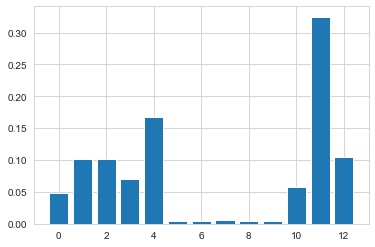

tn: 40770
fp: 446
fn: 1445
tp: 2052
0.6733629294253843  MCC
0.8214571657325861 Precision Score
0.9577080491132333 Accuracy Score

0 ) cough : 0.050245984101827824
1 ) fever : 0.09065348136329847
2 ) sore_throat : 0.08893500402502838
3 ) shortness_of_breath : 0.07014652906095839
4 ) head_ache : 0.19293779143925996
5 ) age_60_and_above_No : 0.004492520229736347
6 ) age_60_and_above_Yes : 0.004146509419122168
7 ) gender_None : 0.0057125186299934565
8 ) gender_female : 0.00420592095048847
9 ) gender_male : 0.004186405047576493
10 ) test_indication_Abroad : 0.05893506871723394
11 ) test_indication_Contact with confirmed : 0.3102739900493057
12 ) test_indication_Other : 0.11512827696617026


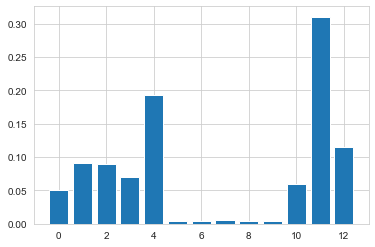

tn: 40771
fp: 445
fn: 1445
tp: 2052
0.6735181439677091  MCC
0.8217861433720465 Precision Score
0.9577304139735647 Accuracy Score

0 ) cough : 0.05035118757425522
1 ) fever : 0.09341262877773074
2 ) sore_throat : 0.08818079708752441
3 ) shortness_of_breath : 0.0731576325561996
4 ) head_ache : 0.18044066588299085
5 ) age_60_and_above_No : 0.004286842256400441
6 ) age_60_and_above_Yes : 0.004349313450959085
7 ) gender_None : 0.005702842197162986
8 ) gender_female : 0.004398479326175622
9 ) gender_male : 0.004317201922411009
10 ) test_indication_Abroad : 0.07041512907862602
11 ) test_indication_Contact with confirmed : 0.30563643242464134
12 ) test_indication_Other : 0.11535084746492266


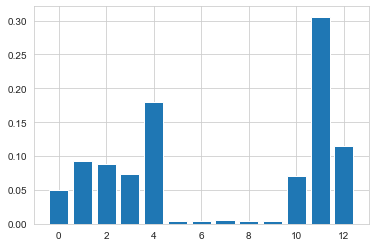

tn: 40771
fp: 445
fn: 1449
tp: 2048
0.672687803393204  MCC
0.8215002005615724 Precision Score
0.957640954532239 Accuracy Score



In [28]:
def sratified_k_fold(X, y):
    skf = StratifiedKFold(n_splits=10) # shuffles the features after split)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.30,
                                                            random_state=0)
        
        # define the undersampling method
        #undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
        # transform the dataset
        #X_train, y_train = undersample.fit_resample(X_train, y_train)


        #### Gradient boost classifier
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        importance = clf.feature_importances_
        X_columns = X_train.columns
        importances = list(zip(X_columns, clf.feature_importances_))
        i = 0
        for x in importances:
            print(i,")",x[0],':', x[1])
            i += 1
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
        y_pred = clf.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print('tn: {}\nfp: {}\nfn: {}\ntp: {}'.format(tn,fp,fn,tp))
        print(matthews_corrcoef(y_test, y_pred), " MCC") # Evaluates the whole model
        print(precision_score(y_test, y_pred, average='binary'), "Precision Score") # Tells how many selected items are relevant
        print(accuracy_score(y_test, y_pred), "Accuracy Score\n") # Tells about the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test

sratified_k_fold(X, y)

### 4. Trying with an input

Now that we observed that that the ppv was around 0.82 and the mcc around 0.67 across 10 folds, we would try to implement this with our own input.

In [29]:
# Set the X and the y-value

y = df['covid'].values
X = df.drop(columns=['covid'])

# Fit the model
clf = RandomForestClassifier()
clf.fit(X, y)

# define input
new_input = [[1,0,0,1,0,1,1,0,1,0,1,0,1]]

# get prediction for new input
new_output = clf.predict(new_input)

# summarize input and output
print(new_input, new_output)

[[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]] [1]
